In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import time

In [45]:
df = pd.read_csv('./dataset/train.csv',sep=',',index_col=0)

In [46]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
dfclean = df.drop(columns=['Name','Ticket','Age','Cabin'])

In [48]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.7+ KB


In [49]:
dfclean = dfclean[~dfclean['Embarked'].isna()]

In [50]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


In [55]:
dfclean.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


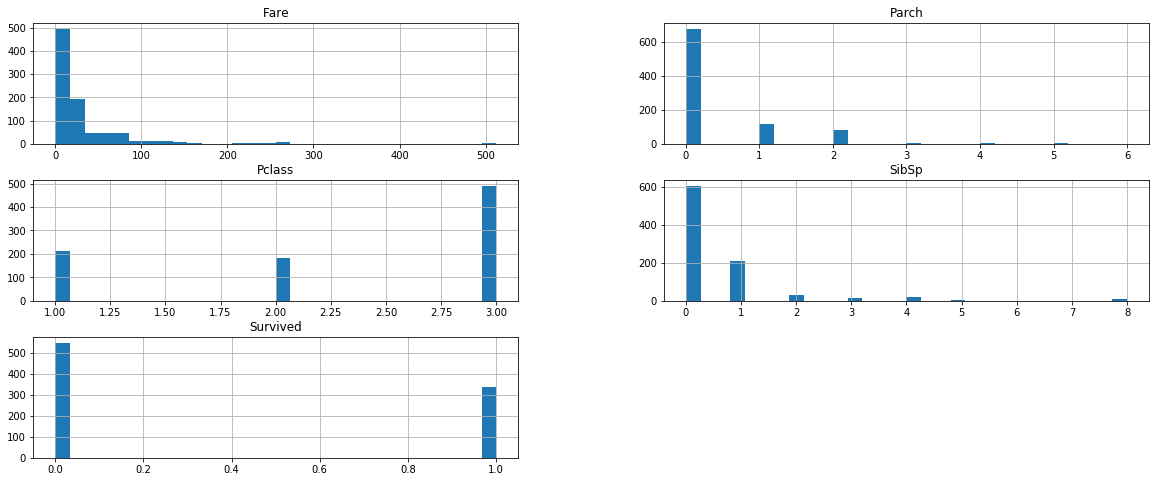

In [51]:
dfclean.hist(bins=30,figsize=(20,8));

In [52]:
corr_matrix = dfclean.corr()

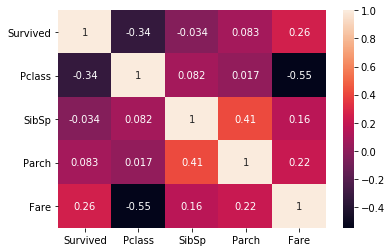

In [53]:
sns.heatmap(corr_matrix,annot=True);

Create encoder for categories

In [56]:
Y=dfclean['Survived']
X=dfclean.drop(columns='Survived')

In [60]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
gender_encoder.fit(dfclean['Sex'])

embark_encoder = LabelEncoder()
embark_encoder.fit(dfclean['Embarked'])

Xenc = X.copy()
Xenc['Sex']=gender_encoder.transform(Xenc['Sex'])
Xenc['Embarked']=embark_encoder.transform(Xenc['Embarked'])

In [61]:
Xenc.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
1,3,1,1,0,7.2500,2
2,1,0,1,0,71.2833,0
3,3,0,0,0,7.9250,2
4,1,0,1,0,53.1000,2
5,3,1,0,0,8.0500,2


In [64]:
from sklearn.preprocessing import StandardScaler

# Scale x data
scaler = StandardScaler()
scaler.fit(Xenc)

xtrain_s = scaler.transform(Xenc)
ytrain = Y

In [71]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

classifs = [
            SGDClassifier(),
            KNeighborsClassifier(),
            DecisionTreeClassifier(random_state=37),
            SVC(),
            RandomForestClassifier(random_state=37),
            AdaBoostClassifier(random_state=37),
            GaussianNB(),
           ]

classif_names=[
                'SGD\t\t',
                'KNN\t\t', 
                'DecisionTree\t', 
                'SVC\t\t',
                'RandomForest\t',
                'AdaBoost\t',
                'Naive Bayes\t',
               ]

# Apply different classifiers
bestscore=0
bestclf =''
for name, clf in zip(classif_names, classifs):
    score = cross_val_score(clf, xtrain_s, ytrain, cv=5, scoring="accuracy")
    print("%s Score :" % (name), score,round(score.min()*100,2))
    

SGD		 Score : [0.80337079 0.73033708 0.74719101 0.78651685 0.76271186] 73.03
KNN		 Score : [0.6741573  0.76966292 0.80337079 0.78089888 0.83615819] 67.42
DecisionTree	 Score : [0.7247191  0.79213483 0.83146067 0.78089888 0.81920904] 72.47
SVC		 Score : [0.80898876 0.80898876 0.80898876 0.79213483 0.83050847] 79.21
RandomForest	 Score : [0.75280899 0.75842697 0.83146067 0.79213483 0.82485876] 75.28
AdaBoost	 Score : [0.73595506 0.79775281 0.80337079 0.80898876 0.80225989] 73.6
Naive Bayes	 Score : [0.75842697 0.78651685 0.78651685 0.80337079 0.80225989] 75.84


In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'C':[0.1,0.5,1,2,5],
        'kernel':['linear','poly','rbf'],
        'gamma':['scale','auto'],
        'class_weight':['','balanced'],
        'decision_function_shape':['ovr','ovo']
    }
]

clf = SVC()
grid_search = GridSearchCV(clf,param_grid,cv=3,return_train_score=True)
grid_search.fit(xtrain_s,ytrain);

In [90]:
grid_search.best_params_

{'C': 1,
 'class_weight': '',
 'decision_function_shape': 'ovr',
 'gamma': 'scale',
 'kernel': 'rbf'}

In [88]:
grid_search.best_score_

0.8087936421269754

In [92]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

ytrain_pred = cross_val_predict(clf, xtrain_s, ytrain, cv=3)

confmatr = confusion_matrix(ytrain, ytrain_pred)

pd.crosstab(ytrain, ytrain_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,497,52,549
1,118,222,340
All,615,274,889


In [95]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytrain, ytrain_pred)

0.7791117539912139

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators':[50,100,200],
        'max_depth':[2,5,10,15]
    }
]

clf = RandomForestClassifier(random_state=37)
grid_search = GridSearchCV(clf,param_grid,cv=3,return_train_score=True)
grid_search.fit(xtrain_s,ytrain);

In [97]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 50}

In [98]:
grid_search.best_score_

0.7953180453180453